In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df = pd.read_csv('../data/compiled_raw_data.csv')

In [3]:
len(df)

2872533

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column                Dtype  
---  ------                -----  
 0   timestamp             float64
 1   activity_id           int64  
 2   heart_rate            float64
 3   IMU_hand_temp         float64
 4   IMU_hand_acc_x_sc16   float64
 5   IMU_hand_acc_y_sc16   float64
 6   IMU_hand_acc_z_sc16   float64
 7   IMU_hand_acc_x_sc6    float64
 8   IMU_hand_acc_y_sc6    float64
 9   IMU_hand_acc_z_sc6    float64
 10  IMU_hand_gyro_x       float64
 11  IMU_hand_gyro_y       float64
 12  IMU_hand_gyro_z       float64
 13  IMU_hand_mag_x        float64
 14  IMU_hand_mag_y        float64
 15  IMU_hand_mag_z        float64
 16  IMU_hand_orient_x     float64
 17  IMU_hand_orient_y     float64
 18  IMU_hand_orient_z     float64
 19  IMU_hand_orient_w     float64
 20  IMU_chest_temp        float64
 21  IMU_chest_acc_x_sc16  float64
 22  IMU_chest_acc_y_sc16  float64
 23  IMU_che

In [5]:
#These are the columns that are to be not used according to the dataset protocol

columns_to_drop = ['IMU_hand_orient_x', 'IMU_hand_orient_y', 'IMU_hand_orient_z','IMU_hand_orient_w',
                   'IMU_chest_orient_x', 'IMU_chest_orient_y', 'IMU_chest_orient_z', 'IMU_chest_orient_w',
                   'IMU_ankle_orient_x', 'IMU_ankle_orient_y', 'IMU_ankle_orient_z', 'IMU_ankle_orient_w',
                   'IMU_hand_acc_x_sc6','IMU_hand_acc_y_sc6','IMU_hand_acc_z_sc6',
                   'IMU_chest_acc_x_sc6','IMU_chest_acc_y_sc6', 'IMU_chest_acc_z_sc6',
                   'IMU_ankle_acc_x_sc6', 'IMU_ankle_acc_y_sc6','IMU_ankle_acc_z_sc6','timestamp']
df.drop(columns_to_drop,axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)



ActivityID Distribution:
0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activity_id, dtype: int64


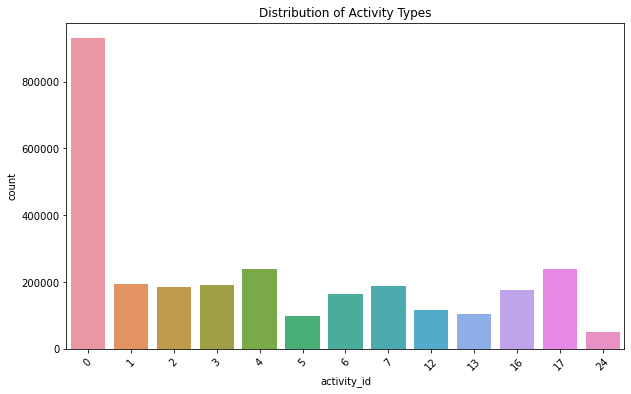

In [6]:
print("ActivityID Distribution:")
print(df['activity_id'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='activity_id')
plt.xticks(rotation=45)
plt.title('Distribution of Activity Types')
plt.show()

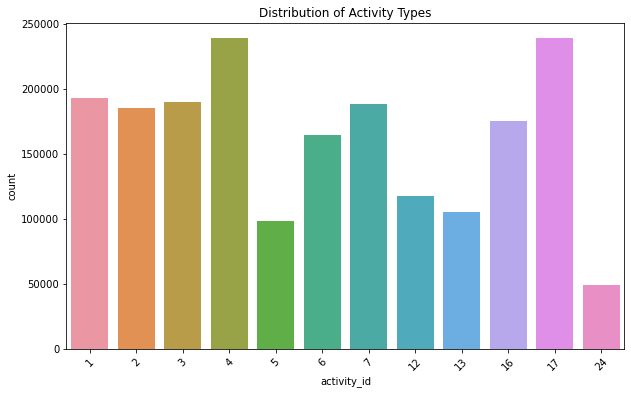

In [7]:
df.drop(df[df['activity_id']==0].index,inplace=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='activity_id')
plt.xticks(rotation=45)
plt.title('Distribution of Activity Types')
plt.show()

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.interpolate()
df.reset_index(drop=True, inplace=True)

In [9]:
df.isnull().sum()

activity_id             0
heart_rate              4
IMU_hand_temp           0
IMU_hand_acc_x_sc16     0
IMU_hand_acc_y_sc16     0
IMU_hand_acc_z_sc16     0
IMU_hand_gyro_x         0
IMU_hand_gyro_y         0
IMU_hand_gyro_z         0
IMU_hand_mag_x          0
IMU_hand_mag_y          0
IMU_hand_mag_z          0
IMU_chest_temp          0
IMU_chest_acc_x_sc16    0
IMU_chest_acc_y_sc16    0
IMU_chest_acc_z_sc16    0
IMU_chest_gyro_x        0
IMU_chest_gyro_y        0
IMU_chest_gyro_z        0
IMU_chest_mag_x         0
IMU_chest_mag_y         0
IMU_chest_mag_z         0
IMU_ankle_temp          0
IMU_ankle_acc_x_sc16    0
IMU_ankle_acc_y_sc16    0
IMU_ankle_acc_z_sc16    0
IMU_ankle_gyro_x        0
IMU_ankle_gyro_y        0
IMU_ankle_gyro_z        0
IMU_ankle_mag_x         0
IMU_ankle_mag_y         0
IMU_ankle_mag_z         0
dtype: int64

In [10]:
df.loc[:4, 'heart_rate'] = 100
df['heart_rate'].isna().sum()

0

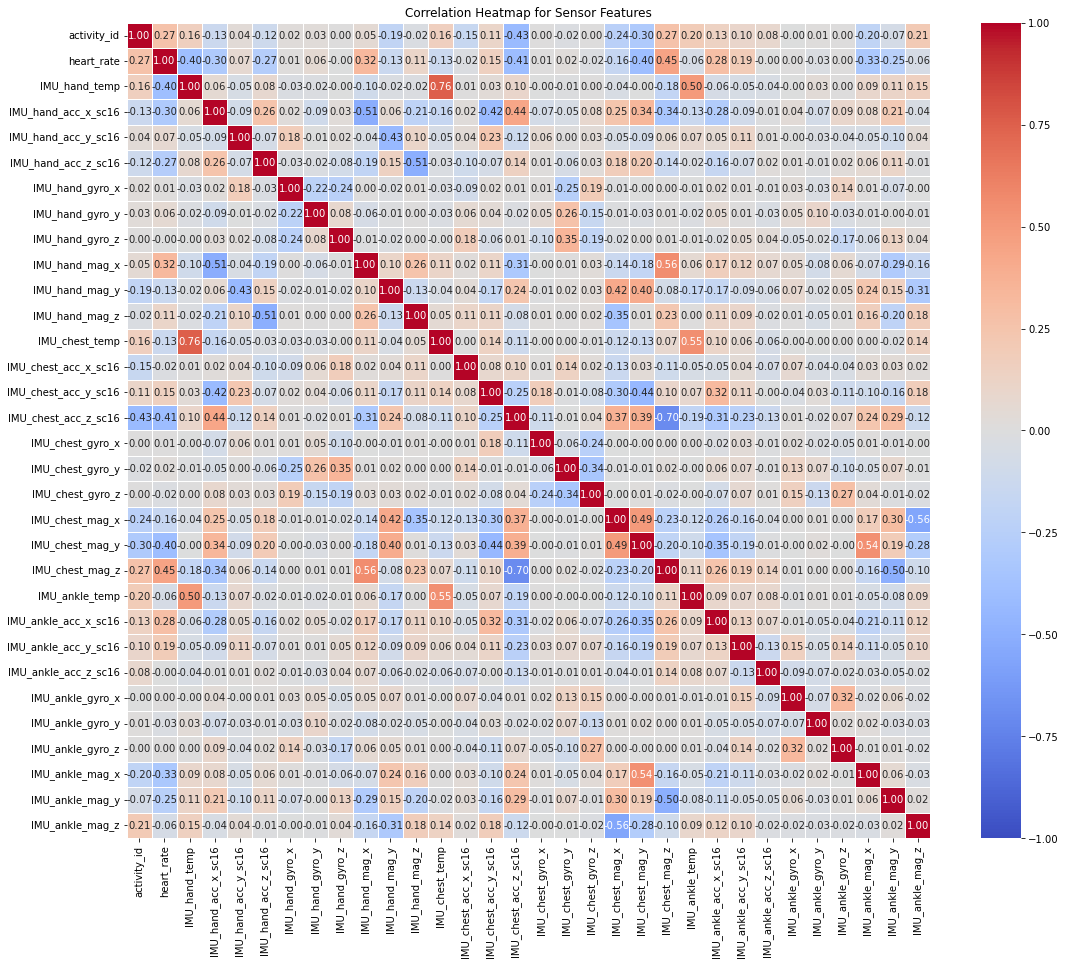

In [11]:
# Correlation heatmap with correlation values displayed
plt.figure(figsize=(18, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap for Sensor Features")
plt.show()

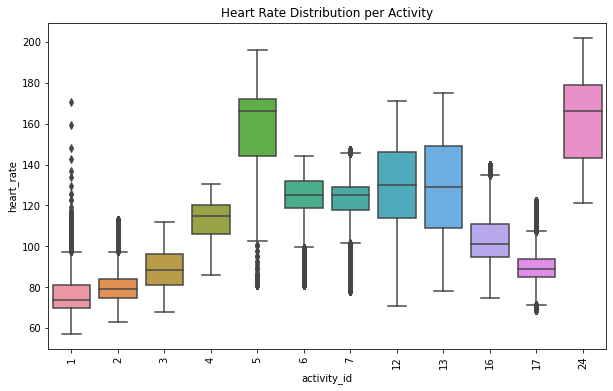

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity_id', y='heart_rate', data=df)
plt.title("Heart Rate Distribution per Activity")
plt.xticks(rotation=90)
plt.show()

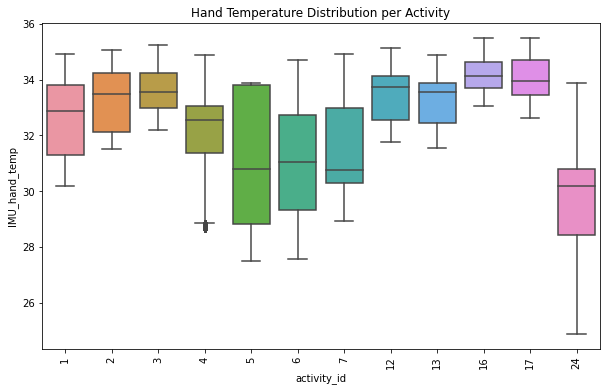

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity_id', y='IMU_hand_temp', data=df)
plt.title("Hand Temperature Distribution per Activity")
plt.xticks(rotation=90)
plt.show()

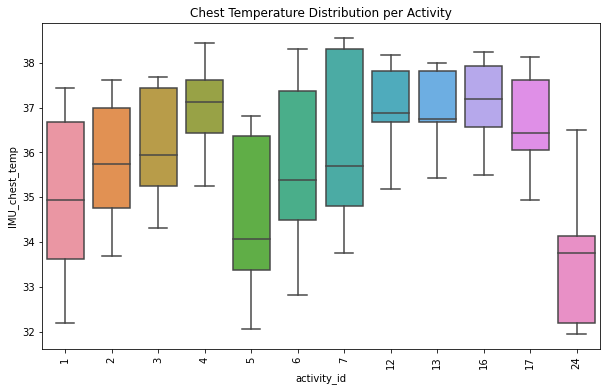

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity_id', y='IMU_chest_temp', data=df)
plt.title("Chest Temperature Distribution per Activity")
plt.xticks(rotation=90)
plt.show()

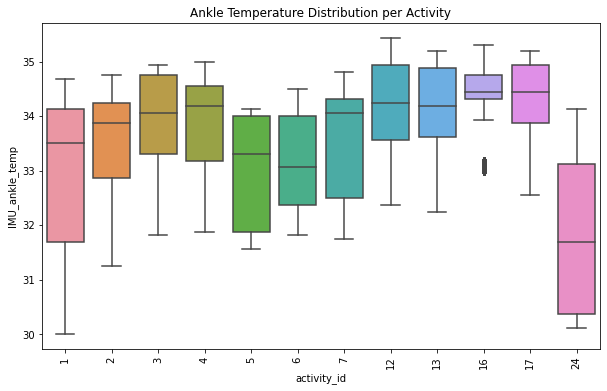

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity_id', y='IMU_ankle_temp', data=df)
plt.title("Ankle Temperature Distribution per Activity")
plt.xticks(rotation=90)
plt.show()

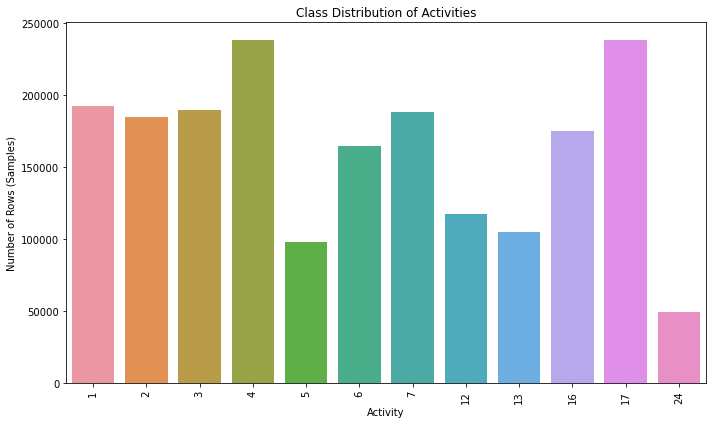

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='activity_id',data=df)
plt.title("Class Distribution of Activities")
plt.xlabel("Activity")
plt.ylabel("Number of Rows (Samples)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [17]:
label_encoder = LabelEncoder()
df['activity_id'] = label_encoder.fit_transform(df[['activity_id']])

/Users/X/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
features = ['heart_rate', 'IMU_hand_temp', 'IMU_hand_acc_x_sc16',
       'IMU_hand_acc_y_sc16', 'IMU_hand_acc_z_sc16', 'IMU_hand_gyro_x',
       'IMU_hand_gyro_y', 'IMU_hand_gyro_z', 'IMU_hand_mag_x',
       'IMU_hand_mag_y', 'IMU_hand_mag_z', 'IMU_chest_temp',
       'IMU_chest_acc_x_sc16', 'IMU_chest_acc_y_sc16', 'IMU_chest_acc_z_sc16',
       'IMU_chest_gyro_x', 'IMU_chest_gyro_y', 'IMU_chest_gyro_z',
       'IMU_chest_mag_x', 'IMU_chest_mag_y', 'IMU_chest_mag_z',
       'IMU_ankle_temp', 'IMU_ankle_acc_x_sc16', 'IMU_ankle_acc_y_sc16',
       'IMU_ankle_acc_z_sc16', 'IMU_ankle_gyro_x', 'IMU_ankle_gyro_y',
       'IMU_ankle_gyro_z', 'IMU_ankle_mag_x', 'IMU_ankle_mag_y',
       'IMU_ankle_mag_z']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942872 entries, 0 to 1942871
Data columns (total 32 columns):
 #   Column                Dtype  
---  ------                -----  
 0   activity_id           int64  
 1   heart_rate            float64
 2   IMU_hand_temp         float64
 3   IMU_hand_acc_x_sc16   float64
 4   IMU_hand_acc_y_sc16   float64
 5   IMU_hand_acc_z_sc16   float64
 6   IMU_hand_gyro_x       float64
 7   IMU_hand_gyro_y       float64
 8   IMU_hand_gyro_z       float64
 9   IMU_hand_mag_x        float64
 10  IMU_hand_mag_y        float64
 11  IMU_hand_mag_z        float64
 12  IMU_chest_temp        float64
 13  IMU_chest_acc_x_sc16  float64
 14  IMU_chest_acc_y_sc16  float64
 15  IMU_chest_acc_z_sc16  float64
 16  IMU_chest_gyro_x      float64
 17  IMU_chest_gyro_y      float64
 18  IMU_chest_gyro_z      float64
 19  IMU_chest_mag_x       float64
 20  IMU_chest_mag_y       float64
 21  IMU_chest_mag_z       float64
 22  IMU_ankle_temp        float64
 23  IMU_ank

In [22]:
df

,activity_id,heart_rate,IMU_hand_temp,IMU_hand_acc_x_sc16,IMU_hand_acc_y_sc16,IMU_hand_acc_z_sc16,IMU_hand_gyro_x,IMU_hand_gyro_y,IMU_hand_gyro_z,IMU_hand_mag_x,...,IMU_ankle_temp,IMU_ankle_acc_x_sc16,IMU_ankle_acc_y_sc16,IMU_ankle_acc_z_sc16,IMU_ankle_gyro_x,IMU_ankle_gyro_y,IMU_ankle_gyro_z,IMU_ankle_mag_x,IMU_ankle_mag_y,IMU_ankle_mag_z
0,0,-0.277411,-1.324439,1.148824,0.680922,0.501724,-0.004677,-0.002266,-0.004980,-0.513054,...,-2.711549,0.050575,-0.218933,0.682796,-0.006258,0.013808,-0.002437,-1.608949,-1.764234,-3.837308
1,0,-0.277411,-1.324439,1.161110,0.592976,0.541436,-0.129991,-0.014920,-0.003975,-0.485710,...,-2.711549,0.044306,-0.223684,0.653335,0.009692,0.058704,-0.000324,-1.597148,-1.739155,-3.837105
2,0,-0.277411,-1.324439,1.160940,0.516025,0.561338,-0.179927,-0.029838,0.002510,-0.507881,...,-2.711549,0.044108,-0.228549,0.643587,-0.040245,-0.024899,-0.005733,-1.567120,-1.714462,-3.849604
3,0,-0.277411,-1.324439,1.149257,0.516206,0.580514,-0.145904,-0.021640,0.010356,-0.471262,...,-2.711549,0.039110,-0.218872,0.682600,-0.037691,0.027704,0.010081,-1.590226,-1.775264,-3.812459
4,0,-0.277411,-1.324439,1.162568,0.532876,0.629362,-0.053622,-0.060732,0.004856,-0.503634,...,-2.711549,0.056278,-0.223870,0.682953,-0.007639,-0.019348,-0.006452,-1.559669,-1.776173,-3.812702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,11,2.019554,-4.250596,1.594259,0.353037,0.504445,-0.218149,-0.156778,0.151207,-1.089553,...,-2.024951,-0.000171,-0.270151,0.084522,0.010053,0.037038,-0.000388,-0.773765,-0.102767,-0.883998
1942868,11,2.019554,-4.250596,1.599544,0.336338,0.475489,-0.207825,-0.175798,0.169245,-1.078947,...,-2.024951,-0.006271,-0.274944,0.064868,0.000669,0.062909,-0.005412,-0.787261,-0.102101,-0.848057
1942869,11,2.019554,-4.250596,1.605386,0.308778,0.475790,-0.218689,-0.173906,0.178048,-1.063532,...,-2.024951,-0.006240,-0.270037,0.064807,-0.023870,0.002118,-0.004455,-0.758967,-0.121105,-0.847940
1942870,11,2.019554,-4.250596,1.617414,0.297686,0.476138,-0.177057,-0.147695,0.174304,-1.083983,...,-2.024951,0.005562,-0.270182,0.084619,-0.033747,0.000110,-0.006823,-0.780513,-0.090494,-0.840853


In [23]:
#Exporting the final cleaned up and scaled data for further use in training

df.to_csv('../data/final_data.csv', index=False) 

# PCA

In [24]:
features = df.iloc[:, 1:]  # All columns except the target 'activityID'
target = df['activity_id']

In [25]:
# Fit PCA 
pca = PCA()
pca_result = pca.fit_transform(df)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Add the first two principal components to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

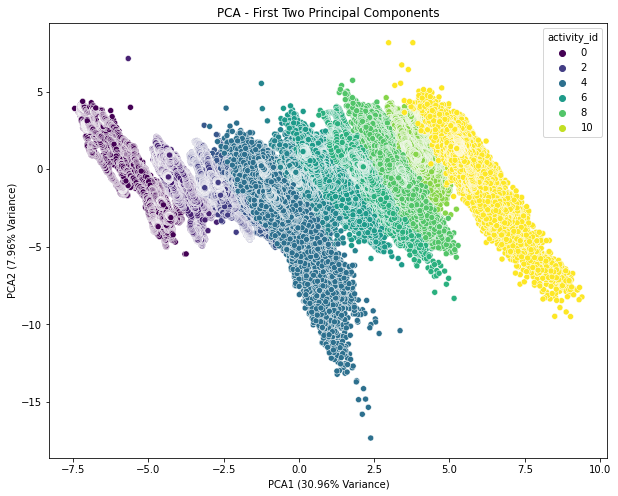

In [26]:
# Plot PCA result for the first two components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue=target, data=df, palette='viridis')
plt.xlabel(f'PCA1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'PCA2 ({explained_variance[1]*100:.2f}% Variance)')
plt.title('PCA - First Two Principal Components')
plt.show()

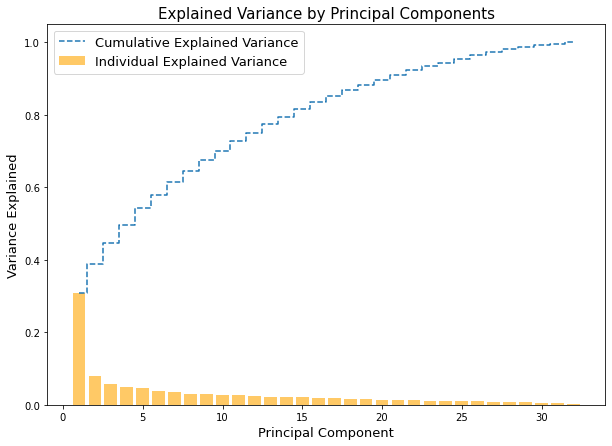

In [27]:
# Plot cumulative and individual explained variance for PCA
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, linestyle='--', drawstyle='steps-mid', label='Cumulative Explained Variance')
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual Explained Variance', color = 'orange')

plt.xlabel('Principal Component', fontsize = 13)
plt.ylabel('Variance Explained', fontsize = 13)
plt.title('Explained Variance by Principal Components', fontsize = 15)
plt.legend(fontsize = 13)
plt.show()